### HIGH STREET DIMENSIONS (TEST)

Getting the data into shape to generate High Street profiles

In [12]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [13]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

In [14]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [15]:
ABPWHY = pd.read_csv("ABPWHY-final.csv")

/opt/conda/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (30,44,45,47,51,53,57,59,65,77,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
CAMDEN = gpd.GeoDataFrame(ABPWHY, geometry = gpd.points_from_xy(ABPWHY['V11'], ABPWHY['V10'], crs="epsg:4126"))

In [17]:
del ABPWHY

In [18]:
CAMDEN = CAMDEN.to_crs("EPSG:27700")

<AxesSubplot:>

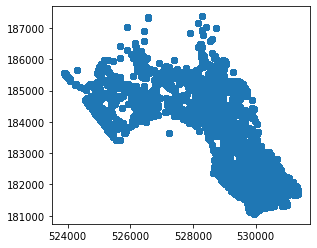

In [97]:
CAMDEN.plot()

In [19]:
Brecknock = gpd.read_file("High Street Points (WHYTHAWK)/Brecknock_new.shp")

In [91]:
Brecknock_half = gpd.read_file("High Street Boundaries/Brecknock.shp")

In [20]:
Kentish = gpd.read_file("High Street Boundaries/Kentish.shp")

In [21]:
Fortress= gpd.read_file("High Street Boundaries/Fortress.shp")

In [22]:
CamdenT= gpd.read_file("High Street Boundaries/CamdenT.shp")

In [23]:
Belsize = gpd.read_file("High Street Boundaries/Belsize.shp")

In [24]:
Loudoun= gpd.read_file("High Street Boundaries/Loudoun.shp")

In [25]:
Haverstock= gpd.read_file("High Street Boundaries/Haverstock.shp")

In [26]:
SouthEnd= gpd.read_file("High Street Boundaries/SouthEnd.shp")

In [27]:
Highgate= gpd.read_file("High Street Boundaries/Highgate.shp")

In [28]:
Cricklewood= gpd.read_file("High Street Points (WHYTHAWK)/Cricklewood_new.shp")

In [29]:
Regents= gpd.read_file("High Street Boundaries/Regents.shp")

In [30]:
Queens= gpd.read_file("High Street Boundaries/Queens.shp")

In [31]:
Kilburn= gpd.read_file("High Street Points (WHYTHAWK)/Kilburn_new.shp")

In [32]:
Mill= gpd.read_file("High Street Boundaries/Mill.shp")

In [33]:
Fortune= gpd.read_file("High Street Boundaries/Fortune.shp")

In [34]:
Willesden= gpd.read_file("High Street Boundaries/Willesden.shp")

In [35]:
Finchley= gpd.read_file("High Street Boundaries/Finchley.shp")

In [36]:
Mansfield= gpd.read_file("High Street Boundaries/Mansfield.shp")

In [37]:
WestEnd= gpd.read_file("High Street Boundaries/WestEnd.shp")

In [38]:
Hampstead= gpd.read_file("High Street Boundaries/Hampstead.shp")

In [39]:
Eversholt= gpd.read_file("High Street Boundaries/Eversholt.shp")

Isolating the data for each highstreet

In [40]:
Brecknock1 = gpd.clip(CAMDEN, Brecknock)

In [93]:
Brecknock2 = gpd.clip(CAMDEN, Brecknock_half)

<AxesSubplot:>

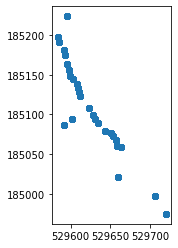

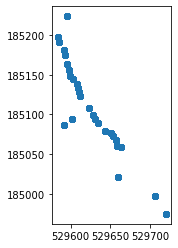

In [94]:
Brecknock1.plot()
Brecknock2.plot()

<AxesSubplot:>

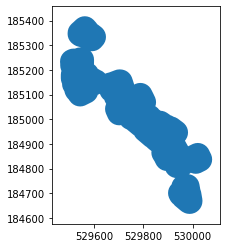

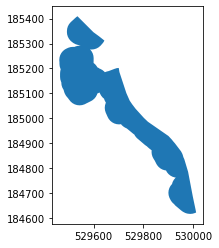

In [95]:
Brecknock.plot()
Brecknock_half.plot()

In [41]:
Kentish1 = gpd.clip(CAMDEN, Kentish)

In [42]:
Fortress1 = gpd.clip(CAMDEN, Fortress)

In [43]:
CamdenT1 = gpd.clip(CAMDEN, CamdenT)

In [44]:
Belsize1 = gpd.clip(CAMDEN, Belsize)

In [45]:
Loudoun1 = gpd.clip(CAMDEN, Loudoun)

In [46]:
Haverstock1 = gpd.clip(CAMDEN, Haverstock)

In [47]:
SouthEnd1 = gpd.clip(CAMDEN, SouthEnd)

In [48]:
Highgate1 = gpd.clip(CAMDEN, Highgate)

In [49]:
Cricklewood1 = gpd.clip(CAMDEN, Cricklewood)

In [50]:
Regents1 = gpd.clip(CAMDEN, Regents)

In [51]:
Queens1 = gpd.clip(CAMDEN, Queens)

In [52]:
Kilburn1 = gpd.clip(CAMDEN, Kilburn)

In [53]:
Mill1 = gpd.clip(CAMDEN, Mill)

In [54]:
Fortune1 = gpd.clip(CAMDEN, Fortune)

In [55]:
Willesden1 = gpd.clip(CAMDEN, Willesden)

In [56]:
Finchley1 = gpd.clip(CAMDEN, Finchley)

In [57]:
Mansfield1 = gpd.clip(CAMDEN, Mansfield)

In [58]:
WestEnd1 = gpd.clip(CAMDEN, WestEnd)

In [59]:
Hampstead1 = gpd.clip(CAMDEN, Hampstead)

In [60]:
Eversholt1= gpd.clip(CAMDEN, Eversholt)

Creating a new column to name the highstreet points

In [61]:
Brecknock1['highstreet'] = "Brecknock"

In [62]:
Kentish1['highstreet'] = "Kentish"

In [63]:
Fortress1['highstreet'] = "Fortress"

In [64]:
CamdenT1['highstreet'] = "CamdenT"

In [65]:
Belsize1['highstreet'] = "Belsize"

In [66]:
Loudoun1['highstreet'] = "Loudoun"

In [67]:
Haverstock1['highstreet'] = "Haverstock"

In [68]:
SouthEnd1['highstreet'] = "SouthEnd"

In [69]:
Highgate1['highstreet'] = "Highgate"

In [70]:
Cricklewood1['highstreet'] = "Cricklewood"

In [71]:
Regents1['highstreet'] = "Regents"

In [72]:
Queens1['highstreet'] = "Queens"

In [73]:
Kilburn1['highstreet'] = "Kilburn"

In [74]:
Mill1['highstreet'] = "Mill"

In [75]:
Fortune1['highstreet'] = "Fortune"

In [76]:
Willesden1['highstreet'] = "Willesden"

In [77]:
Finchley1['highstreet'] = "Finchley"

In [78]:
Mansfield1['highstreet'] = "Mansfield"

In [79]:
WestEnd1['highstreet'] = "WestEnd"

In [80]:
Hampstead1['highstreet'] = "Hampstead"

In [81]:
Eversholt1['highstreet'] = "Eversholt"

Check the two highstreets we don't care about

In [82]:
Finchley1

,Unnamed: 0,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,...,V70,V71,V72,V73,V74,V75,V76,V77,geometry,highstreet


In [83]:
Highgate1

,Unnamed: 0,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,...,V70,V71,V72,V73,V74,V75,V76,V77,geometry,highstreet
341840,341840,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341841,341841,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341842,341842,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341843,341843,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341844,341844,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341845,341845,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341846,341846,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341847,341847,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341848,341848,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate
341849,341849,00016010830002,E09000007,Camden,Inner London - West,8724138000,NURSERY GND FLR 108,SWAINS LANE,LONDON,N6 6QS,...,NaN,E05000137,NaN,2012-12-27,2,EN1,85.0,NaN,POINT (528303.033 187372.429),Highgate


Appending all the highstreets into one

In [84]:
camden_complete = pd.concat([Brecknock1, Kentish1, Fortress1, CamdenT1, Belsize1, Loudoun1, Haverstock1, SouthEnd1, Cricklewood1, Regents1, Queens1, Kilburn1, Mill1, Fortune1, Willesden1, Mansfield1, WestEnd1, Hampstead1, Eversholt1], ignore_index=True)

In [85]:
camden_complete

,Unnamed: 0,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,...,V70,V71,V72,V73,V74,V75,V76,V77,geometry,highstreet
0,31416,0023300030000B,E09000007,Camden,Inner London - West,11957063,3,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529663.889 185058.687),Brecknock
1,31417,0023300030000B,E09000007,Camden,Inner London - West,11957063,3,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529663.889 185058.687),Brecknock
2,31418,0023300030000B,E09000007,Camden,Inner London - West,11957063,3,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529663.889 185058.687),Brecknock
3,31419,0023300030000B,E09000007,Camden,Inner London - West,11957063,3,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529663.889 185058.687),Brecknock
4,31420,0023300030000B,E09000007,Camden,Inner London - West,11957063,3,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529663.889 185058.687),Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82536,405217,00889012012203,E09000007,Camden,Inner London - West,2209255000,THE ROCKET 120-122,EUSTON ROAD,LONDON,NW1 2AL,...,NaN,E05000143,NaN,2012-03-19,7,CL,226.0,NaN,POINT (529779.867 182756.890),Eversholt
82537,405218,00889012012203,E09000007,Camden,Inner London - West,2209255000,THE ROCKET 120-122,EUSTON ROAD,LONDON,NW1 2AL,...,NaN,E05000143,NaN,2012-03-19,7,CL,226.0,NaN,POINT (529779.867 182756.890),Eversholt
82538,405219,00889012012203,E09000007,Camden,Inner London - West,2209255000,THE ROCKET 120-122,EUSTON ROAD,LONDON,NW1 2AL,...,NaN,E05000143,NaN,2012-03-19,7,CL,226.0,NaN,POINT (529779.867 182756.890),Eversholt
82539,405220,00889012012203,E09000007,Camden,Inner London - West,2209255000,THE ROCKET 120-122,EUSTON ROAD,LONDON,NW1 2AL,...,NaN,E05000143,NaN,2012-03-19,7,CL,226.0,NaN,POINT (529779.867 182756.890),Eversholt


In [86]:
camden_complete.to_csv('camden-complete-highstreet-newest.csv')

In [221]:
camden_complete.loc[camden_complete['category'].isnull(), 'category'] = "Other"

In [222]:
camden2021 = camden_complete[(camden_complete['period'] == '2021-03')]

In [223]:
camden2021 = camden2021[(camden2021['status'] == True)]

In [116]:
camden2021

,Unnamed: 0,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,...,V70,V71,V72,V73,V74,V75,V76,V77,geometry,highstreet
131,31547,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock
175,31591,00233000910012,E09000007,Camden,Inner London - West,98395063,GND F 9,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529765.797 185019.320),Brecknock
263,31679,00233001300024,E09000007,Camden,Inner London - West,3863401000,BST & GND FLR FRONT 13,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,0,CR1,409.0,NaN,POINT (529756.798 185025.322),Brecknock
307,31767,00233001710019,E09000007,Camden,Inner London - West,98400063,GND F 17,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,3,CS,249.0,NaN,POINT (529746.797 185036.316),Brecknock
351,31811,00233001900019,E09000007,Camden,Inner London - West,1122864000,GND FLR 19,BRECKNOCK ROAD,LONDON,N7 0BL,...,NaN,E05000139,NaN,2012-03-19,3,CS,249.0,NaN,POINT (529743.797 185041.325),Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124930,415213,00782002470031,E09000007,Camden,Inner London - West,12791112000,SUITE 211A. 2ND FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,NW1 1DB,...,NaN,E05000143,NaN,NaN,0,CO,203.0,NaN,POINT (529695.776 182727.258),Eversholt
124960,415243,00782002470033,E09000007,Camden,Inner London - West,12791232000,STORE ADJ SUITE 201/217. 2ND FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,NW1 1DB,...,NaN,E05000143,NaN,NaN,0,CO,203.0,NaN,POINT (529695.776 182727.258),Eversholt
124975,415258,00782002470035,E09000007,Camden,Inner London - West,12791243000,PT BST - GND FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,NW1 1DB,...,NaN,E05000143,NaN,NaN,0,CO,203.0,NaN,POINT (529695.776 182727.258),Eversholt
124990,415273,00782005010001,E09000007,Camden,Inner London - West,11686053000,50,EVERSHOLT STREET,LONDON,NW1 1DA,...,NaN,E05000143,NaN,NaN,0,CS,249.0,NaN,POINT (529631.778 182803.262),Eversholt


In [90]:
camden2021.to_csv('CAMDEN HS 2021 (non-vacant).csv')

### TIDY THE DATA TYPES

In [224]:
cats = ['highstreet', 'sub_category', 'use_category', 'scat_code', 'category']

In [225]:
for c in cats:
    print(f"Converting {c}")
    camden2021[c] = camden2021[c].astype('category')

Converting highstreet
Converting sub_category
Converting use_category
Converting scat_code
Converting category


In [226]:
print(camden2021[cats[3]].cat.categories.values)

[  3  11  18  21  24  25  39  40  42  43  45  53  61  66  67  70  85  96
 101 106 111 113 114 136 137 139 152 155 156 159 165 195 199 203 209 215
 223 224 225 226 228 232 234 235 243 249 251 259 260 268 270 278 289 292
 293 303 409 416 417 429 436 437 500 505 508 509 992 995 999]


In [227]:
voa_scat = pd.read_excel('data/voa-primary-description-scat-lookup.xlsx')

In [228]:
voa_scat

,SCat Code,SCat Description,Primary Code,Primary Description
0,3,Advertising Right,CA,Advertising Right & Premises
1,3,Advertising Right,CA1,Advertising Station & Premises
2,18,ATMs,CX,Commercial (Unclassified)
3,19,Auction Rooms,CX,Commercial (Unclassified)
4,21,Banks/Insurance/Building Society Offices & Oth...,CO,Offices & Premises
...,...,...,...,...
411,230,RAF Hereditaments,TD1,Forces Careers Office & Premises
412,230,RAF Hereditaments,TD2,Auxiliary Defence Establishment & Premises
413,230,RAF Hereditaments,TX,Treasury (Unclassified)
414,240,Royal Palaces,TX,Treasury (Unclassified)


I want to match:
- camden2021['V75'] with voa_scat[Primary Code] 
- camden2021['V76'] with voa_scat[SCat Code] 

In [229]:
camden = camden2021.merge(voa_scat['SCat Description'], left_on = camden2021['V76'], right_on =voa_scat['SCat Code'])

In [230]:
camden = camden.drop('key_0', axis=1)

In [231]:
camden = camden.merge(voa_scat['Primary Description'], left_on = camden['V75'], right_on =voa_scat['Primary Code'])

In [232]:
camden = camden.drop('key_0', axis=1)

In [233]:
camden = camden.drop('Unnamed: 0', axis=1)

In [234]:
camden

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,V72,V73,V74,V75,V76,V77,geometry,highstreet,SCat Description,Primary Description
0,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,Shops,...,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock,Shops,Shop & Premises
1,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,Shops,...,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock,Shops,Shop & Premises
2,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,Shops,...,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock,Shops,Shop & Premises
3,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,Shops,...,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock,Shops,Shop & Premises
4,0023300071001B,E09000007,Camden,Inner London - West,98394063,GND F 7,BRECKNOCK ROAD,LONDON,N7 0BL,Shops,...,NaN,2012-03-19,1,CS,249.0,NaN,POINT (529769.796 185014.326),Brecknock,Shops,Shop & Premises
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44375,00780008810007,E09000007,Camden,Inner London - West,196542063,INCL BST R/O 92 EVERSHOLT STREET AT 88,EVERSHOLT STREET,LONDON,NW1 1BP,Garages (Transport and Commercial),...,NaN,2012-03-19,0,CG2,113.0,NaN,POINT (529558.776 182908.258),Eversholt,Garages (Transport & Commercial),Garage & Premises
44376,00780008810007,E09000007,Camden,Inner London - West,196542063,INCL BST R/O 92 EVERSHOLT STREET AT 88,EVERSHOLT STREET,LONDON,NW1 1BP,Garages (Transport and Commercial),...,NaN,2012-03-19,0,CG2,113.0,NaN,POINT (529558.776 182908.258),Eversholt,Garages (Transport & Commercial),Garage & Premises
44377,05006088820016,E09000007,Camden,Inner London - West,950600000,UNIT 0 AT THE O2 CENTRE,FINCHLEY ROAD,LONDON,NW3 6LU,Retail Warehouses and Foodstores,...,NaN,2012-03-19,0,CS10,235.0,NaN,POINT (525875.745 184756.294),WestEnd,Retail Warehouses & Foodstores,Retail Warehouse & Premises
44378,05006088820016,E09000007,Camden,Inner London - West,950600000,UNIT 0 AT THE O2 CENTRE,FINCHLEY ROAD,LONDON,NW3 6LU,Retail Warehouses and Foodstores,...,NaN,2012-03-19,0,CS10,235.0,NaN,POINT (525875.745 184756.294),WestEnd,Retail Warehouses & Foodstores,Retail Warehouse & Premises


In [236]:
camden.to_csv('camden-profiling-before-manipulations.csv')

In [237]:
camden.groupby('highstreet').count()

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,V71,V72,V73,V74,V75,V76,V77,geometry,SCat Description,Primary Description
highstreet,,,,,,,,,,,,,,,,,,,,,
Belsize,679,679,679,679,679,679,679,679,679,679,...,679,0,534,679,679,679,0,679,679,679
Brecknock,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,...,1043,0,605,1043,1043,1043,0,1043,1043,1043
CamdenT,11736,11736,11736,11736,11736,11736,11736,11736,11736,11736,...,11736,0,8639,11736,11736,11736,0,11736,11736,11736
Cricklewood,621,621,621,621,621,621,621,621,621,621,...,621,0,536,621,621,621,0,621,621,621
Eversholt,1198,1198,1198,1198,1198,1198,1198,1198,1198,1198,...,1198,0,804,1198,1198,1198,0,1198,1198,1198
Fortress,4829,4829,4829,4829,4829,4829,4829,4829,4829,4829,...,4829,0,4378,4829,4829,4829,0,4829,4829,4829
Fortune,763,763,763,763,763,763,763,763,763,763,...,763,0,729,763,763,763,0,763,763,763
Hampstead,4095,4095,4095,4095,4095,4095,4095,4095,4095,4095,...,4095,0,3323,4095,4095,4095,0,4095,4095,4095
Haverstock,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,...,1054,0,901,1054,1054,1054,0,1054,1054,1054


In [137]:
highstreets = list(camden['highstreet'].unique())

#### 1. CATEGORICAL: sub-category

In [144]:
sub_category = camden[['sub_category', 'highstreet']]

In [145]:
sub_category = sub_category.groupby('sub_category').count()

In [146]:
sub_category

,highstreet
sub_category,
Industrial General,944
Industrial Light,12
Leisure Amusement & Entertainment Centres,138
Leisure Budget Hotels,2
Leisure Cultural Attractions,35
Leisure General Hotels (3 star),15
Leisure Sports centres and Private Clubs,546
Office General,6576
Office IT / Data Centres,6


In [150]:
counter = 0 
stoppingCondition = len(highstreets)

while counter < stoppingCondition:
        i = highstreets[counter]
        m = camden.loc[camden['highstreet'] == i]
        m = m.groupby('sub_category').count()
        sub_category[i] = m['highstreet']
        counter += 1

In [151]:
sub_category

,highstreet,Brecknock,Kentish,Fortress,CamdenT,Belsize,Loudoun,Haverstock,SouthEnd,Cricklewood,Regents,Queens,Kilburn,Mill,Fortune,Willesden,Mansfield,WestEnd,Hampstead,Eversholt
sub_category,,,,,,,,,,,,,,,,,,,,
Industrial General,944,27,99,146,309,27,72,0,9,0,9,63,54,0,0,9,0,120,0,0
Industrial Light,12,0,2,0,0,0,0,1,0,0,0,2,0,0,0,0,0,7,0,0
Leisure Amusement & Entertainment Centres,138,0,0,3,134,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Leisure Budget Hotels,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Leisure Cultural Attractions,35,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leisure General Hotels (3 star),15,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,9,0,0
Leisure Sports centres and Private Clubs,546,0,0,34,73,0,53,43,10,0,0,86,96,0,12,0,0,53,86,0
Office General,6576,120,275,306,2837,240,30,230,127,10,270,22,219,72,44,50,0,834,460,430
Office IT / Data Centres,6,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [152]:
sub_category = sub_category.drop(['highstreet'], axis=1)

In [153]:
sub_category = sub_category.transpose()

In [154]:
sub_category

sub_category,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
Brecknock,27,0,0,0,0,0,0,120,0,350,0,44,0,0,496,0,6,0
Kentish,99,2,0,0,0,0,0,275,0,0,76,48,0,0,987,36,43,0
Fortress,146,0,3,0,35,0,34,306,0,0,0,45,26,13,4019,26,176,0
CamdenT,309,0,134,1,0,3,73,2837,0,0,313,136,48,0,7440,35,401,6
Belsize,27,0,0,0,0,3,0,240,0,0,0,0,0,0,372,0,37,0
Loudoun,72,0,0,0,0,0,53,30,0,0,0,1,1,0,606,0,16,0
Haverstock,0,1,0,0,0,0,43,230,0,0,4,9,0,0,712,13,42,0
SouthEnd,9,0,0,0,0,0,10,127,0,0,0,55,1,0,797,0,39,0
Cricklewood,0,0,0,0,0,0,0,10,0,0,0,6,1,0,574,3,27,0
Regents,9,0,0,0,0,0,0,270,0,0,0,9,0,0,1046,0,45,0


In [144]:
sub_category = camden[['sub_category', 'highstreet']]

In [145]:
sub_category = sub_category.groupby('sub_category').count()

In [146]:
sub_category

,highstreet
sub_category,
Industrial General,944
Industrial Light,12
Leisure Amusement & Entertainment Centres,138
Leisure Budget Hotels,2
Leisure Cultural Attractions,35
Leisure General Hotels (3 star),15
Leisure Sports centres and Private Clubs,546
Office General,6576
Office IT / Data Centres,6


In [150]:
counter = 0 
stoppingCondition = len(highstreets)

while counter < stoppingCondition:
        i = highstreets[counter]
        m = camden.loc[camden['highstreet'] == i]
        m = m.groupby('sub_category').count()
        sub_category[i] = m['highstreet']
        counter += 1

In [151]:
sub_category

,highstreet,Brecknock,Kentish,Fortress,CamdenT,Belsize,Loudoun,Haverstock,SouthEnd,Cricklewood,Regents,Queens,Kilburn,Mill,Fortune,Willesden,Mansfield,WestEnd,Hampstead,Eversholt
sub_category,,,,,,,,,,,,,,,,,,,,
Industrial General,944,27,99,146,309,27,72,0,9,0,9,63,54,0,0,9,0,120,0,0
Industrial Light,12,0,2,0,0,0,0,1,0,0,0,2,0,0,0,0,0,7,0,0
Leisure Amusement & Entertainment Centres,138,0,0,3,134,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Leisure Budget Hotels,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Leisure Cultural Attractions,35,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leisure General Hotels (3 star),15,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,9,0,0
Leisure Sports centres and Private Clubs,546,0,0,34,73,0,53,43,10,0,0,86,96,0,12,0,0,53,86,0
Office General,6576,120,275,306,2837,240,30,230,127,10,270,22,219,72,44,50,0,834,460,430
Office IT / Data Centres,6,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [152]:
sub_category = sub_category.drop(['highstreet'], axis=1)

In [153]:
sub_category = sub_category.transpose()

In [154]:
sub_category

sub_category,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
Brecknock,27,0,0,0,0,0,0,120,0,350,0,44,0,0,496,0,6,0
Kentish,99,2,0,0,0,0,0,275,0,0,76,48,0,0,987,36,43,0
Fortress,146,0,3,0,35,0,34,306,0,0,0,45,26,13,4019,26,176,0
CamdenT,309,0,134,1,0,3,73,2837,0,0,313,136,48,0,7440,35,401,6
Belsize,27,0,0,0,0,3,0,240,0,0,0,0,0,0,372,0,37,0
Loudoun,72,0,0,0,0,0,53,30,0,0,0,1,1,0,606,0,16,0
Haverstock,0,1,0,0,0,0,43,230,0,0,4,9,0,0,712,13,42,0
SouthEnd,9,0,0,0,0,0,10,127,0,0,0,55,1,0,797,0,39,0
Cricklewood,0,0,0,0,0,0,0,10,0,0,0,6,1,0,574,3,27,0
Regents,9,0,0,0,0,0,0,270,0,0,0,9,0,0,1046,0,45,0


#### 2. SUM FLOORSPACES

In [162]:
floorspace = camden[['floor_area', 'highstreet']]

In [163]:
floorspace1 = floorspace.groupby(['highstreet']).sum()

In [164]:
floorspace2 = floorspace.groupby(['highstreet']).mean()

In [169]:
floorspace1.rename(columns = {'floor_area':'total_floor_area'}, inplace = True)

In [168]:
floorspace2.rename(columns = {'floor_area':'mean_floor_area'}, inplace = True)

In [170]:
floorspace = pd.concat([floorspace1, floorspace2], axis=1)

In [171]:
floorspace

,total_floor_area,mean_floor_area
highstreet,,
Belsize,6.330958e+04,93.239439
Brecknock,7.848528e+04,75.249546
CamdenT,1.842300e+06,156.978526
Cricklewood,5.419681e+04,87.273450
Eversholt,1.547365e+05,129.162363
Fortress,6.253205e+05,129.492747
Fortune,7.148981e+04,93.695691
Hampstead,4.311688e+05,105.291523
Haverstock,1.436683e+05,136.307661


#### 3. RENTAL VALUATION

In [179]:
rental_val = camden[['rental_valuation', 'highstreet']]

In [180]:
rental_val1 = rental_val.groupby(['highstreet']).sum()

In [181]:
rental_val2 = rental_val.groupby(['highstreet']).mean()

In [182]:
rental_val1.rename(columns = {'rental_valuation':'total_rental_valuation'}, inplace = True)

In [183]:
rental_val2.rename(columns = {'rental_valuation':'mean_rental_valuation'}, inplace = True)

In [184]:
rental_valuation = pd.concat([rental_val1, rental_val2], axis=1)

In [185]:
rental_valuation

,total_rental_valuation,mean_rental_valuation
highstreet,,
Belsize,16526340.0,24339.234168
Brecknock,14851550.0,14239.261745
CamdenT,758574264.0,64636.525562
Cricklewood,11481400.0,18488.566828
Eversholt,51672550.0,43132.345576
Fortress,149837010.0,31028.579416
Fortune,16685250.0,21867.955439
Hampstead,253360950.0,61870.805861
Haverstock,46504050.0,44121.489564


#### 4. RATES EXPECTED

In [186]:
rates_expected = camden[['rates_expected', 'highstreet']]

In [187]:
rates_expected1 = rates_expected.groupby(['highstreet']).sum()

In [188]:
rates_expected2 = rates_expected.groupby(['highstreet']).mean()

In [189]:
rates_expected1.rename(columns = {'rates_expected':'total_rates_expected'}, inplace = True)

In [190]:
rates_expected2.rename(columns = {'rates_expected':'mean_rates_expected'}, inplace = True)

In [191]:
rates_expected = pd.concat([rates_expected1, rates_expected2], axis=1)

In [192]:
rates_expected

,total_rates_expected,mean_rates_expected
highstreet,,
Belsize,8.260944e+06,12166.338233
Brecknock,7.438659e+06,7131.983653
CamdenT,3.860135e+08,32891.404417
Cricklewood,5.734809e+06,9234.796457
Eversholt,2.627581e+07,21933.066736
Fortress,7.545396e+07,15625.173533
Fortune,8.401444e+06,11011.066514
Hampstead,1.288164e+08,31457.008315
Haverstock,2.353074e+07,22325.175949


#### 5. RATES PAID

In [193]:
rates_paid = camden[['rates_paid', 'highstreet']]

In [194]:
rates_paid1 = rates_paid.groupby(['highstreet']).sum()

In [195]:
rates_paid2 = rates_paid.groupby(['highstreet']).mean()

In [196]:
rates_paid1.rename(columns = {'rates_paid':'total_rates_paid'}, inplace = True)

In [197]:
rates_paid2.rename(columns = {'rates_paid':'mean_rates_paid'}, inplace = True)

In [198]:
rates_paid = pd.concat([rates_paid1, rates_paid2], axis=1)

In [199]:
rates_paid

,total_rates_paid,mean_rates_paid
highstreet,,
Belsize,2.119443e+06,4388.081366
Brecknock,1.351523e+06,3078.639818
CamdenT,1.498536e+08,15559.501940
Cricklewood,1.649943e+06,4319.223482
Eversholt,6.105202e+06,6399.582631
Fortress,2.401344e+07,7159.641130
Fortune,3.788444e+06,5828.375077
Hampstead,6.420256e+07,18203.163394
Haverstock,1.186689e+07,12997.685805


#### 6. CATEGORICAL: use_category

In [201]:
use_category = camden[['use_category', 'highstreet']]

In [202]:
use_category = use_category.groupby('use_category').count()

In [203]:
use_category

,highstreet
use_category,
ATMs,35
Advertising Right,88
Amusement Arcades,2
Banks/Insurance/Building Society Offices & Other A2 Uses,245
Betting Offices,15
...,...
Tennis Courts/Clubs,43
Vehicle Repair Workshops & Garages,10
Veterinary Clinics / Animal Clinics,35


In [204]:
counter = 0 
stoppingCondition = len(highstreets)

while counter < stoppingCondition:
        i = highstreets[counter]
        m = camden.loc[camden['highstreet'] == i]
        m = m.groupby('use_category').count()
        use_category[i] = m['highstreet']
        counter += 1

In [205]:
use_category

,highstreet,Brecknock,Kentish,Fortress,CamdenT,Belsize,Loudoun,Haverstock,SouthEnd,Cricklewood,Regents,Queens,Kilburn,Mill,Fortune,Willesden,Mansfield,WestEnd,Hampstead,Eversholt
use_category,,,,,,,,,,,,,,,,,,,,
ATMs,35,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0
Advertising Right,88,0,4,22,20,0,0,2,2,2,0,2,8,0,4,0,2,20,0,0
Amusement Arcades,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Banks/Insurance/Building Society Offices & Other A2 Uses,245,0,0,24,42,0,0,0,0,0,0,0,6,0,0,0,0,125,48,0
Betting Offices,15,0,0,2,6,0,1,0,1,1,0,0,1,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tennis Courts/Clubs,43,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0
Vehicle Repair Workshops & Garages,10,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6,0,0
Veterinary Clinics / Animal Clinics,35,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0


In [206]:
use_category = use_category.drop(['highstreet'], axis=1)

In [207]:
use_category = use_category.transpose()

In [208]:
use_category

use_category,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,Betting Offices,Bingo Halls (National Scheme),Cafes,Cafes/Restaurants Within/Part of Specialist Property,Car Parks (Multi-Storey),Car Parks (Surfaced Open),...,Sports & Leisure Centres Within/Part of Specialist Property,Stores,Studios,"Surgeries, Clinics, Health Centres (Contractors Valuation)","Surgeries, Clinics, Health Centres (Rental Valuation)",Tennis Courts/Clubs,Vehicle Repair Workshops & Garages,Veterinary Clinics / Animal Clinics,"Village Halls, Scout Huts, Cadet Huts Etc",Wine Bars
Brecknock,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kentish,0,4,0,0,0,0,8,0,0,0,...,0,8,35,0,0,0,2,0,0,0
Fortress,0,22,0,24,2,0,20,0,0,0,...,0,16,0,0,16,0,0,0,0,0
CamdenT,0,20,1,42,6,1,38,0,2,4,...,0,20,315,8,8,0,0,0,2,0
Belsize,0,0,0,0,0,0,2,0,0,0,...,0,4,0,0,0,0,0,0,0,0
Loudoun,0,0,0,0,1,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,1
Haverstock,0,2,0,0,0,0,2,0,0,0,...,0,4,0,0,4,43,0,0,0,0
SouthEnd,0,2,0,0,1,0,12,0,0,0,...,10,0,35,0,12,0,0,0,2,0
Cricklewood,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
Regents,0,0,0,0,0,0,6,0,0,0,...,0,4,0,0,8,0,0,0,0,0


#### 7. CATEGORICAL: category

In [238]:
category = camden[['category', 'highstreet']]

In [239]:
category = category.groupby('category').count()

In [240]:
category

,highstreet
category,
Industrial,970
Leisure,736
Office,6967
Other,1222
Retail,34485


In [241]:
counter = 0 
stoppingCondition = len(highstreets)

while counter < stoppingCondition:
        i = highstreets[counter]
        m = camden.loc[camden['highstreet'] == i]
        m = m.groupby('category').count()
        category[i] = m['highstreet']
        counter += 1

In [242]:
category

,highstreet,Brecknock,Kentish,Fortress,CamdenT,Belsize,Loudoun,Haverstock,SouthEnd,Cricklewood,Regents,Queens,Kilburn,Mill,Fortune,Willesden,Mansfield,WestEnd,Hampstead,Eversholt
category,,,,,,,,,,,,,,,,,,,,
Industrial,970,27,101,146,315,27,72,1,9,0,9,65,54,0,0,9,0,135,0,0
Leisure,736,0,0,72,211,3,53,43,10,0,0,86,97,0,12,0,0,63,86,0
Office,6967,470,275,306,2837,240,30,230,127,10,270,22,219,72,50,50,0,869,460,430
Other,1222,44,124,45,449,0,1,13,55,6,9,166,27,46,48,2,2,78,86,21
Retail,34485,502,1066,4260,7924,409,623,767,837,605,1091,1184,2578,1170,653,246,298,6062,3463,747


In [243]:
category = category.drop(['highstreet'], axis=1)

In [244]:
category = category.transpose()

In [245]:
category

category,Industrial,Leisure,Office,Other,Retail
Brecknock,27,0,470,44,502
Kentish,101,0,275,124,1066
Fortress,146,72,306,45,4260
CamdenT,315,211,2837,449,7924
Belsize,27,3,240,0,409
Loudoun,72,53,30,1,623
Haverstock,1,43,230,13,767
SouthEnd,9,10,127,55,837
Cricklewood,0,0,10,6,605
Regents,9,0,270,9,1091


#### 8. Buildings

In [251]:
buildings = camden[['location_code', 'highstreet']]

In [252]:
buildings = buildings.groupby('highstreet').count()

In [254]:
buildings.rename(columns = {'location_code':'total_buildings'}, inplace = True)

In [255]:
buildings

,total_buildings
highstreet,
Belsize,679
Brecknock,1043
CamdenT,11736
Cricklewood,621
Eversholt,1198
Fortress,4829
Fortune,763
Hampstead,4095
Haverstock,1054


#### COMBINE THE DATAFRAMES

In [256]:
camden_highstreets = pd.concat([buildings, floorspace, rental_valuation, sub_category, use_category, category, rates_paid, rates_expected], axis=1)

In [257]:
camden_highstreets

,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,...,Wine Bars,Industrial,Leisure,Office,Other,Retail,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected
Belsize,679,6.330958e+04,93.239439,16526340.0,24339.234168,27,0,0,0,0,...,0,27,3,240,0,409,2.119443e+06,4388.081366,8.260944e+06,12166.338233
Brecknock,1043,7.848528e+04,75.249546,14851550.0,14239.261745,27,0,0,0,0,...,0,27,0,470,44,502,1.351523e+06,3078.639818,7.438659e+06,7131.983653
CamdenT,11736,1.842300e+06,156.978526,758574264.0,64636.525562,309,0,134,1,0,...,0,315,211,2837,449,7924,1.498536e+08,15559.501940,3.860135e+08,32891.404417
Cricklewood,621,5.419681e+04,87.273450,11481400.0,18488.566828,0,0,0,0,0,...,0,0,0,10,6,605,1.649943e+06,4319.223482,5.734809e+06,9234.796457
Eversholt,1198,1.547365e+05,129.162363,51672550.0,43132.345576,0,0,0,0,0,...,0,0,0,430,21,747,6.105202e+06,6399.582631,2.627581e+07,21933.066736
Fortress,4829,6.253205e+05,129.492747,149837010.0,31028.579416,146,0,3,0,35,...,0,146,72,306,45,4260,2.401344e+07,7159.641130,7.545396e+07,15625.173533
Fortune,763,7.148981e+04,93.695691,16685250.0,21867.955439,0,0,0,0,0,...,0,0,12,50,48,653,3.788444e+06,5828.375077,8.401444e+06,11011.066514
Hampstead,4095,4.311688e+05,105.291523,253360950.0,61870.805861,0,0,0,0,0,...,0,0,86,460,86,3463,6.420256e+07,18203.163394,1.288164e+08,31457.008315
Haverstock,1054,1.436683e+05,136.307661,46504050.0,44121.489564,0,1,0,0,0,...,0,1,43,230,13,767,1.186689e+07,12997.685805,2.353074e+07,22325.175949
Kentish,1566,2.046713e+05,130.696866,31687640.0,20234.763729,99,2,0,0,0,...,0,101,0,275,124,1066,3.636263e+06,3156.478099,1.591674e+07,10163.944355


In [259]:
camden_highstreets['rates_diff'] = camden_highstreets['total_rates_expected'] - camden_highstreets['total_rates_paid']

In [260]:
camden_highstreets

,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,...,Industrial,Leisure,Office,Other,Retail,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,rates_diff
Belsize,679,6.330958e+04,93.239439,16526340.0,24339.234168,27,0,0,0,0,...,27,3,240,0,409,2.119443e+06,4388.081366,8.260944e+06,12166.338233,6.141500e+06
Brecknock,1043,7.848528e+04,75.249546,14851550.0,14239.261745,27,0,0,0,0,...,27,0,470,44,502,1.351523e+06,3078.639818,7.438659e+06,7131.983653,6.087136e+06
CamdenT,11736,1.842300e+06,156.978526,758574264.0,64636.525562,309,0,134,1,0,...,315,211,2837,449,7924,1.498536e+08,15559.501940,3.860135e+08,32891.404417,2.361600e+08
Cricklewood,621,5.419681e+04,87.273450,11481400.0,18488.566828,0,0,0,0,0,...,0,0,10,6,605,1.649943e+06,4319.223482,5.734809e+06,9234.796457,4.084865e+06
Eversholt,1198,1.547365e+05,129.162363,51672550.0,43132.345576,0,0,0,0,0,...,0,0,430,21,747,6.105202e+06,6399.582631,2.627581e+07,21933.066736,2.017061e+07
Fortress,4829,6.253205e+05,129.492747,149837010.0,31028.579416,146,0,3,0,35,...,146,72,306,45,4260,2.401344e+07,7159.641130,7.545396e+07,15625.173533,5.144053e+07
Fortune,763,7.148981e+04,93.695691,16685250.0,21867.955439,0,0,0,0,0,...,0,12,50,48,653,3.788444e+06,5828.375077,8.401444e+06,11011.066514,4.613000e+06
Hampstead,4095,4.311688e+05,105.291523,253360950.0,61870.805861,0,0,0,0,0,...,0,86,460,86,3463,6.420256e+07,18203.163394,1.288164e+08,31457.008315,6.461389e+07
Haverstock,1054,1.436683e+05,136.307661,46504050.0,44121.489564,0,1,0,0,0,...,1,43,230,13,767,1.186689e+07,12997.685805,2.353074e+07,22325.175949,1.166385e+07
Kentish,1566,2.046713e+05,130.696866,31687640.0,20234.763729,99,2,0,0,0,...,101,0,275,124,1066,3.636263e+06,3156.478099,1.591674e+07,10163.944355,1.228047e+07


In [261]:
camden_highstreets.to_csv('CB counts for Camden High Street.csv')